In [1]:
# Automatic Speech Recognition WS-17-18
# Exercise 4, Task 4.2

# If you need a 'inf', you can use float("inf")
# which behaves as a infinite number w.r.t. addition.

# Please make use of the functions and the variables
# provided in this block when you write your answer codes.

import matplotlib.pyplot as plt
import numpy as np
import math

# Utilities
def Read(filename):
    data = []
    # Read function
    with open(filename) as f:
        data_str = f.readlines()
        for i in range(0, len(data_str)):
            data.append(float(data_str[i].rstrip()))
        return data
    
def Init():
    # Initialize the computation counter by 0.
    global counter
    counter = 0
    # Initialize the table of size TxS by -1.
    global D
    D = -np.ones([T,S])
    print("Initialization done.")

def dist(x,y):  # l1 distance.
    global counter
    # We count the number of distance computation.
    counter = counter + 1
    return np.abs(x-y)


/Users/laneskij/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Let's see what the data points look like.


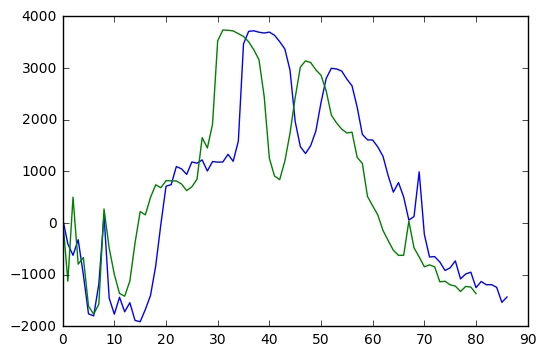

Initialization done.


In [2]:
# Introduction: Read the data
# This is another helper code block which introduces
# the name of variables to be used in your solution.

# The tasks start at the next block.

# Download the data from L2P and put the paths here:
# Small data for quick test:
small_test_data = "/Users/laneskij/asr-exercises/pyAssignment/small_test.dat"
small_ref_data = "/Users/laneskij/asr-exercises/pyAssignment/small_ref.dat"
small_test = Read(small_test_data)
small_ref = Read(small_ref_data)
# Full data:
test_data = "/Users/laneskij/asr-exercises/pyAssignment/test.dat"
ref_data = "/Users/laneskij/asr-exercises/pyAssignment/ref.dat"
full_test = Read(test_data)
full_ref = Read(ref_data)

test = full_test
ref = full_ref
# Please use the variable names 'test' and 'ref' in your
# answer code. Then, you can run test with the small data
# by adding the following lines before your code:
#test = small_test
#ref = small_ref

# Visualize the data
print("Let's see what the data points look like.")
plt.plot(test)
plt.plot(ref)
plt.show()

# Define some global variables
T = len(test)
S = len(ref)

maxJump = 2
jumpPen = [2, 0, 2] # time distortion penalties
# Define containers
D = -np.ones([T,S])
counter = 0
# Initialize the table
Init()


In [4]:
test = small_test
ref = small_ref
T = len(test)
S = len(ref)

In [4]:
#   Task 4.2 (a)

# For this task, you can first use the small data set.
test = small_test
ref = small_ref
T = len(test)
S = len(ref)

def Recursive():
    print("Task 4.2 (a)")
    # TODO: Your task is to implement a helper
    # function "_recursive" below
    return _recursive(T-1,S-1)

def _recursive(t,s):
    
    localDist = dist(test[t],ref[s])
    if (t == 0):
        if (s == 0):
            return localDist
        else:
            return float("inf")
    elif (s == 0):
        dTemp = []
        for i in range(1):
            dTemp.append(_recursive(t-1, s-i)+jumpPen[i])
    elif (s == 1):
            dTemp = []
            for i in range(2):
                dTemp.append(_recursive(t-1, s-i)+jumpPen[i])    
    else:
        dTemp = []
        for i in range(3):
            dTemp.append(_recursive(t-1, s-i)+jumpPen[i])    
    
    return localDist +min(dTemp)

# Here you can test on the small data set.
print("[Small data] Global distance is", Recursive())
print("    which should be 3101.0")
print("[Small data] Number of computation is", counter)
print("    which should be 19238")

# You can also try to run a test on the full data,
# but it should take forever to finish.


Task 4.2 (a)
('[Small data] Global distance is', 3101.0)
    which should be 3101.0
('[Small data] Number of computation is', 19238)
    which should be 19238


In [15]:
#   Task 4.2 (b)

# For this task, you can try both the small
# and the full data.
test = full_test
ref = full_ref
T = len(test)
S = len(ref)

def Memoization():
    print("Task 4.2 (b)")
    # TODO: Your task is to implement a helper
    # function "_memoize" below
    return _memoize(T-1, S-1)

def _memoize(t, s):
    if (D[t,s] == -1):
        localDist = dist(test[t],ref[s])
        if (t == 0):
            if (s == 0):
                D[t,s] = localDist
                return D[t,s]
            else:
                D[t,s] = float("inf")
                return float("inf")
        elif (s == 0):
            dTemp = []
            for i in range(1):
                dTemp.append(_memoize(t-1, s-i)+jumpPen[i])
        elif (s == 1):
                dTemp = []
                for i in range(2):
                    dTemp.append(_memoize(t-1, s-i)+jumpPen[i])    
        else:
            dTemp = []
            for i in range(3):
                dTemp.append(_memoize(t-1, s-i)+jumpPen[i])
        D[t,s] = localDist +min(dTemp)
    return D[t,s]


Init()
print("Global distance we get is", Memoization())
print("    which should be 14925.0")
print("Number of computation of our code is", counter)
print("    which should be 5407")

# You can also test on the small data to compare the number
# of computation with your code in 4.2.(a), then the number of
# computation should be 75.

Initialization done.
Task 4.2 (b)
('Global distance we get is', 14925.0)
    which should be 14925.0
('Number of computation of our code is', 5407)
    which should be 5407


In [27]:
#   Task 4.2 (c)

# For this task, you can try both the small
# and the full data.
test = full_test
ref = full_ref
T = len(test)
S = len(ref)

def Iterative():
    print("Code for Task 4.2 (c)")
    return _iterative()

def _iterative():
    
    D[0,0] = dist(test[0],ref[0])
    for t in range(1,T):
        for s in range (min([2*t, S])):
            localDist = dist(test[t],ref[s])
            if(s == 0):
                dTemp = []
                for i in range(1):
                    dTemp.append(D[t-1, s-i]+jumpPen[i])
                D[t,s] = localDist +min(dTemp)               
            elif (s == 1):
                dTemp = []
                for i in range(2):
                    dTemp.append(D[t-1, s-i]+jumpPen[i])
                D[t,s] = localDist +min(dTemp)
            else:
                dTemp = []
                for i in range(3):
                    dTemp.append(D[t-1, s-i]+jumpPen[i])
                D[t,s] = localDist +min(dTemp)
    return D[T-1,S-1]

Init()
print("Global distance is", Iterative())
print("    which should be 14925.0")
print("Number of computation is", counter)
print("    which should be equal to 6967 or better.")
# You can also test on the small data to compare the number
# of computation with your code in 4.2.(a), then the number of
# computation should be 91 or better.

Initialization done.
Code for Task 4.2 (c)
('Global distance is', 14071.0)
    which should be 14925.0
('Number of computation is', 5407)
    which should be equal to 6967 or better.


In [ ]:
# End of the exercise 4.2